In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense
from torch.utils.tensorboard import SummaryWriter
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

Using TensorFlow backend.
/scratch/huangtin_cs537/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/scratch/huangtin_cs537/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/scratch/huangtin_cs537/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np

In [3]:
from keras.models import Sequential
from keras.layers import Convolution2D #images are two dimensional. Videos are three dimenstional with time.
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

#initialize the classifier CNN
classifier = Sequential() #Please note that there is another way to build a mode: Functional API.

#applying convolution operation --> build the convolutional layer
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
#32, 3, 3 --> 32 filters with 3 x 3 for each filter. 
#start with 32 filters, and then create more layers with 64, 128, 256, etc
#expected format of the images.
# 256, 256, 3 --> 3 color channels (RGB), 256 x 256 pixels. But when using CPU, 3, 64, 64 --> due to computational limitation
classifier.add(MaxPooling2D(pool_size = (2,2)))
# 2 x 2 size --> commonly used to keep much information.

#Flattening --> creating a long vector.
classifier.add(Flatten()) #no parameters needed.

#classic ANN - full connection
classifier.add(Dense(output_dim = 128, activation = 'relu'))
#common practice: number of hidden nodes between the number of input nodes and output nodes, and choose powers of 2
classifier.add(Dense(output_dim = 3, activation = 'sigmoid'))
classifier.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

/scratch/huangtin_cs537/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  # This is added back by InteractiveShellApp.init_path()


In [11]:
classifier = Sequential() 
classifier.add(Conv2D(64, (5, 5), input_shape=(64, 64, 3))) 
classifier.add(Activation('relu')) 
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.1)) 
  
classifier.add(Conv2D(32, (3, 3))) 
classifier.add(Activation('relu')) 
classifier.add(MaxPooling2D(pool_size=(2, 2))) 
classifier.add(Dropout(0.1)) 
  
classifier.add(Conv2D(32, (3, 3))) 
classifier.add(Activation('relu')) 
classifier.add(MaxPooling2D(pool_size=(2, 2))) 
classifier.add(Dropout(0.1)) 
  
classifier.add(Flatten()) 
classifier.add(Dense(50)) #Increase to see how accuracy performs 
#consider also with 0.1 dropout it went from training with 25 to training with 45

classifier.add(Activation('relu')) 
classifier.add(Dropout(0.1)) #compare 0.5 with to 0.1 then 0.2 and 0.3
classifier.add(Dense(1)) 
classifier.add(Dense(3, activation='sigmoid'))
classifier.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [12]:
model_name = 'compare_adam_9000'

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('../data_compare/train', 
                                                    target_size = (64, 64), 
                                                    batch_size = 32,
                                                   class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('../data_compare/test',
                                                target_size = (64, 64),
                                                 batch_size = 32, 
                                                 class_mode = 'categorical')
tensorboard = TensorBoard(log_dir="logs/{}".format(model_name))
history = classifier.fit_generator(training_set, 
                         samples_per_epoch = 9000, 
                        nb_epoch = 10, 
                        validation_data = test_set, 
                        nb_val_samples = 3000,
                        callbacks=[tensorboard]
                                  )

Found 9000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


/scratch/huangtin_cs537/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/scratch/huangtin_cs537/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., callbacks=[<keras.ca..., steps_per_epoch=281, epochs=10, validation_steps=3000)`


Epoch 1/10
281/281 [==============================] - 516s 2s/step - loss: 0.6314 - acc: 0.6704 - val_loss: 0.6221 - val_acc: 0.7318
Epoch 2/10
281/281 [==============================] - 485s 2s/step - loss: 0.5928 - acc: 0.6838 - val_loss: 0.5519 - val_acc: 0.6864
Epoch 3/10
281/281 [==============================] - 492s 2s/step - loss: 0.5099 - acc: 0.7119 - val_loss: 0.4436 - val_acc: 0.7852
Epoch 4/10
281/281 [==============================] - 492s 2s/step - loss: 0.4238 - acc: 0.7664 - val_loss: 0.3765 - val_acc: 0.7740
Epoch 5/10
281/281 [==============================] - 499s 2s/step - loss: 0.3824 - acc: 0.7662 - val_loss: 0.3660 - val_acc: 0.7673
Epoch 6/10
281/281 [==============================] - 497s 2s/step - loss: 0.3667 - acc: 0.7664 - val_loss: 0.3403 - val_acc: 0.7734
Epoch 7/10
281/281 [==============================] - 344s 1s/step - loss: 0.3575 - acc: 0.7701 - val_loss: 0.3698 - val_acc: 0.7623
Epoch 8/10
281/281 [==============================] - 270s 961ms/step

In [52]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 30752)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               3936384   
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 387       
Total params: 3,937,667
Trainable params: 3,937,667
Non-trainable params: 0
_________________________________________________________________


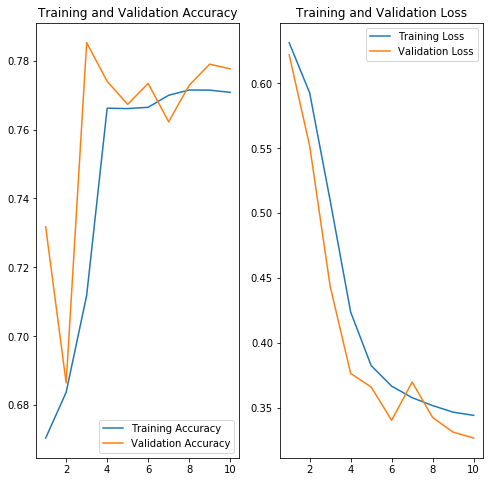

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(1,11)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])